## Rank the surfaces based on the screening readout

#### Setup

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import PIL
import os
from rankFeaturesFunctions import calculateRank,plotSurfaceRankMeasurements,makePairPlot,filterRank,plotRank,boxPlotTopAndBottom,sortRanked,showImagesFlat,showImagesTopAndBottom
from scipy.stats import ks_2samp, anderson_ksamp

#### Step 1: Load the data objects

In [6]:
pathToImageObject=os.getcwd()+"/DataAnalysis/"       
locationOfImageObject=pathToImageObject+"imageOutliersRemoved.csv"
# check if file exists
if os.path.isfile(locationOfImageObject):
    imagedata=pd.read_csv(locationOfImageObject,low_memory=False)
    # replace any empty strings with NaNs
    imagedata=imagedata.replace('', np.nan)
else:
    print("File not found, check if you finished outlier removal")


#### Step 2: Rank the data based on feature of interest

##### Step 2.1: Select the feature of interest

In [9]:
## write an console to select the feature of interest
featureOfInterestUser="Median_Nuclei_Intensity_IntegratedIntensity_CorrYap"

##### Step 2.2: rank the surfaces to the feature of interest

In [10]:
surfacesRank=calculateRank(ScreenData=imagedata,
                           featureOfInterest=featureOfInterestUser)

C:\Users\tkuijpe1\OneDrive - TU Eindhoven\Documents\03_BiS\02_SOP_DataAnalysis\01_Python Scripts SOP\TopoScreen Data Analysis\rankFeaturesFunctions.py:26: UserWarning: p-value capped: true value larger than 0.25
  _,_,pvalue=anderson_ksamp([sg1, sg2])
C:\Users\tkuijpe1\OneDrive - TU Eindhoven\Documents\03_BiS\02_SOP_DataAnalysis\01_Python Scripts SOP\TopoScreen Data Analysis\rankFeaturesFunctions.py:26: UserWarning: p-value capped: true value larger than 0.25
  _,_,pvalue=anderson_ksamp([sg1, sg2])
C:\Users\tkuijpe1\OneDrive - TU Eindhoven\Documents\03_BiS\02_SOP_DataAnalysis\01_Python Scripts SOP\TopoScreen Data Analysis\rankFeaturesFunctions.py:26: UserWarning: p-value capped: true value larger than 0.25
  _,_,pvalue=anderson_ksamp([sg1, sg2])
C:\Users\tkuijpe1\OneDrive - TU Eindhoven\Documents\03_BiS\02_SOP_DataAnalysis\01_Python Scripts SOP\TopoScreen Data Analysis\rankFeaturesFunctions.py:26: UserWarning: p-value capped: true value larger than 0.25
  _,_,pvalue=anderson_ksamp([sg1

##### Step 2.3: Plot the scoring metrics of the ranked surfaces

In [11]:
surfacesRank.max()

FeatureIdx                                                             2177.000000
Screen_ADpvalue_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap       0.250000
Screen_KSpvalue_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap       1.000000
Screen_SNR_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap           11.708061
Screen_Mean_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap          15.358271
Screen_SD_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap            13.752563
Screen_Median_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap        12.794300
dtype: float64

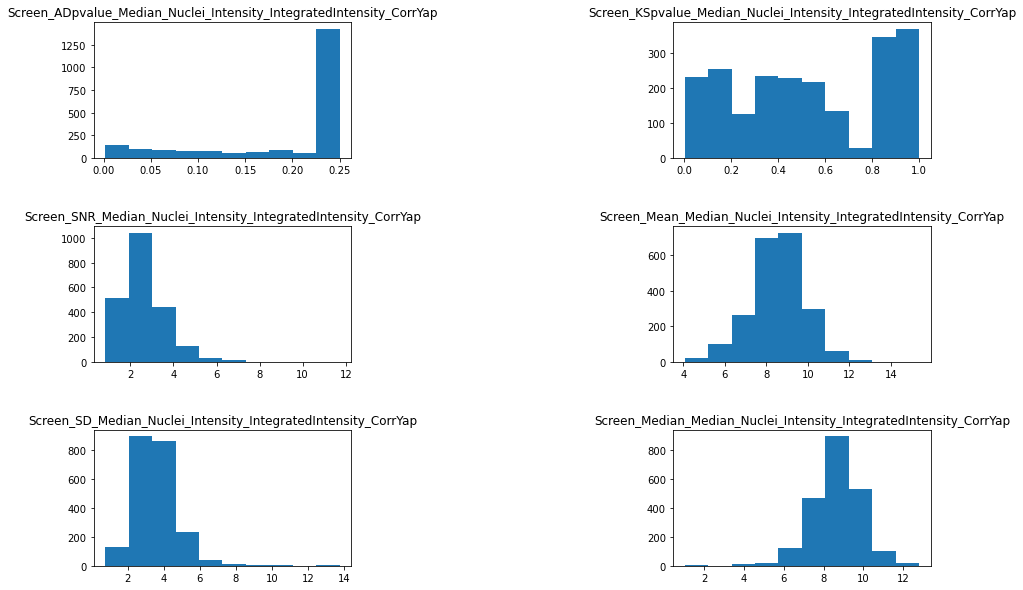

In [12]:
plotSurfaceRankMeasurements(surfacesRank)

##### Step 2.4: Display the relation between the different scoring metrics

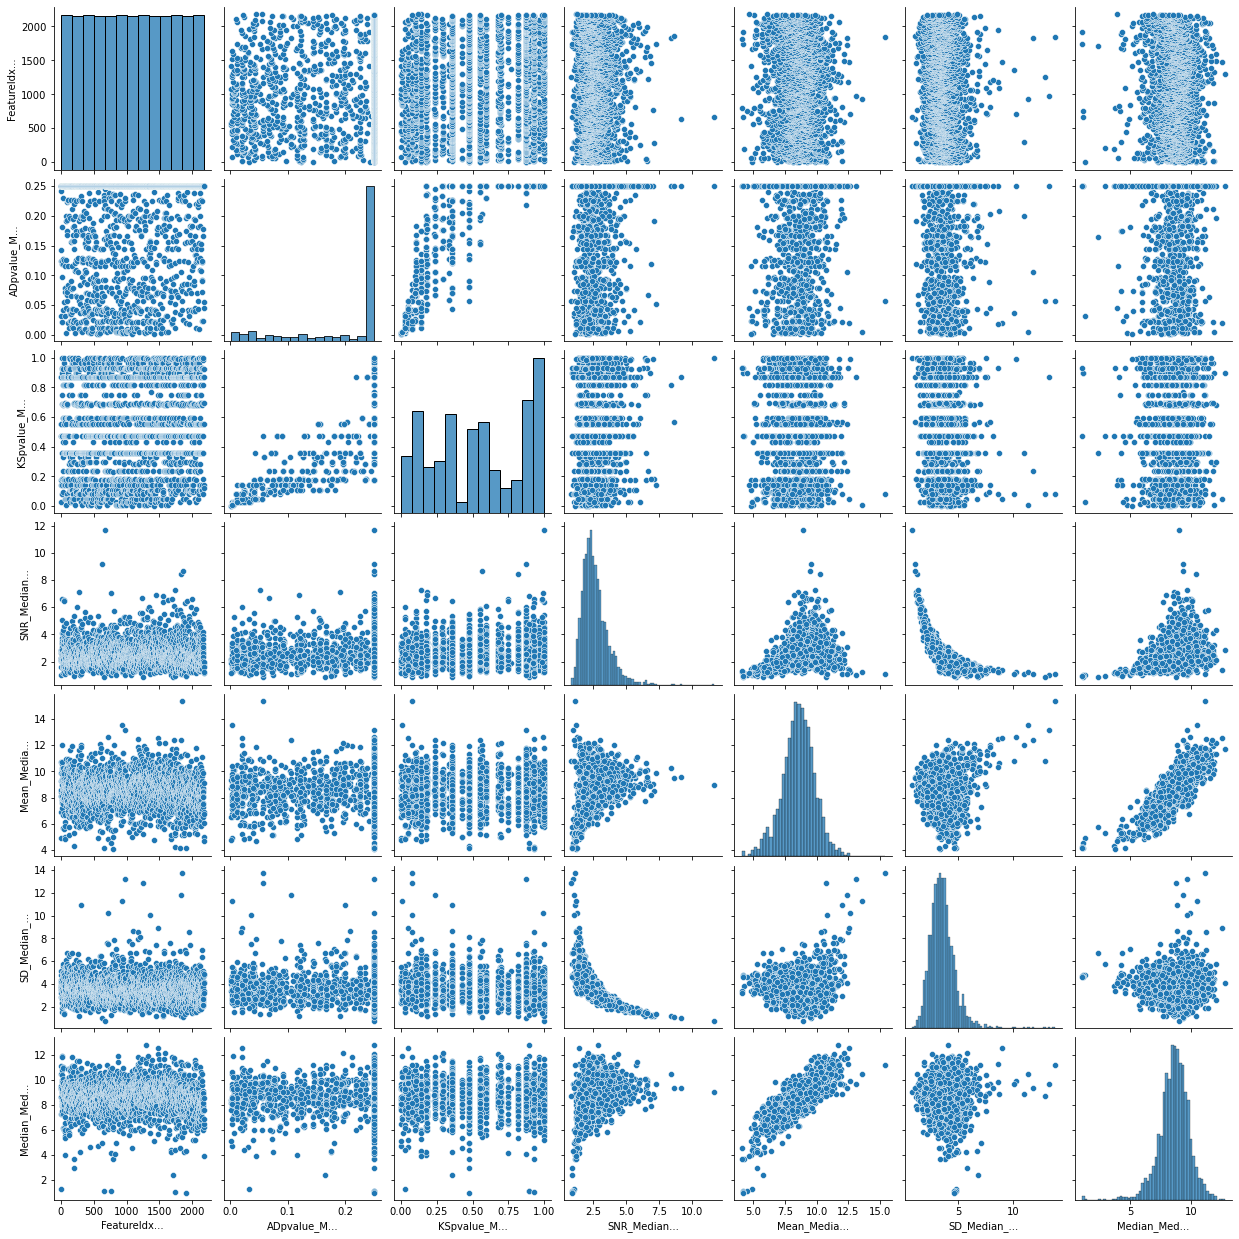

In [13]:
makePairPlot(surfacesRank)

#### Step 3: Filter the ranked data based on a feature of interest

Perfom a rank based filtering based on the p-value and the Signal to Noise Ratio (SNR)

step 3.1: filter the data based on the p-values, set the lower and upper bound of p-values to remove (default lower bound: 0.05 and upper bound:1)

In [14]:
# Lower and upper bound are the p-values not to select (so remove data if p-value>0.05)
metricOfInterestToFilter="Screen_ADpvalue_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap"
lowerbound=0.05
upperbound=1

In [15]:
surfacesRankPVF=filterRank(rank=surfacesRank,
           filterMetric=metricOfInterestToFilter,
           valuesRangeToInclude=[lowerbound,upperbound])

242 unique surafces were excluded from the analysis
The following FeatureIdx were excluded based on the Screen_ADpvalue_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap
1
17
18
34
70
77
80
109
122
125
140
142
150
157
172
173
174
179
185
186
188
190
208
221
224
238
264
271
273
284
296
305
308
330
336
340
344
358
359
369
371
372
389
390
393
416
418
423
432
441
443
447
454
455
457
466
469
473
475
478
479
494
516
547
549
550
551
552
553
555
560
574
576
577
579
583
593
603
604
605
607
615
620
624
632
635
638
647
671
675
679
681
690
691
693
703
705
707
715
721
722
747
769
776
778
782
783
790
800
813
821
822
834
838
842
855
869
870
886
887
889
907
910
911
912
914
916
918
919
929
931
946
954
955
968
969
971
972
988
998
1001
1007
1013
1015
1020
1034
1036
1041
1042
1048
1053
1066
1071
1074
1076
1078
1083
1085
1107
1115
1118
1130
1142
1143
1145
1146
1149
1157
1169
1178
1183
1184
1185
1198
1204
1207
1217
1250
1251
1260
1283
1308
1309
1310
1312
1313
1339
1350
1351
1353
1358
1364
1376
1378
1382
1

step 3.2: filter the data based on the SNR ration, set the lower and upper bound of SNR values (default lower bound:1 and upper bound:20)

In [16]:
featureOfInterestToFilter2="Screen_SNR_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap"
lowerbound=1
upperbound=20

In [17]:
surfacesRankPVF_SNR=filterRank(rank=surfacesRankPVF,
           filterMetric=featureOfInterestToFilter2,
           valuesRangeToInclude=[lowerbound,upperbound])

9 unique surafces were excluded from the analysis
The following FeatureIdx were excluded based on the Screen_SNR_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap
206
659
758
973
1254
1715
1745
1911
1912


Step 3.4: Check how relations between ranking metrics changed after applying filtering steps

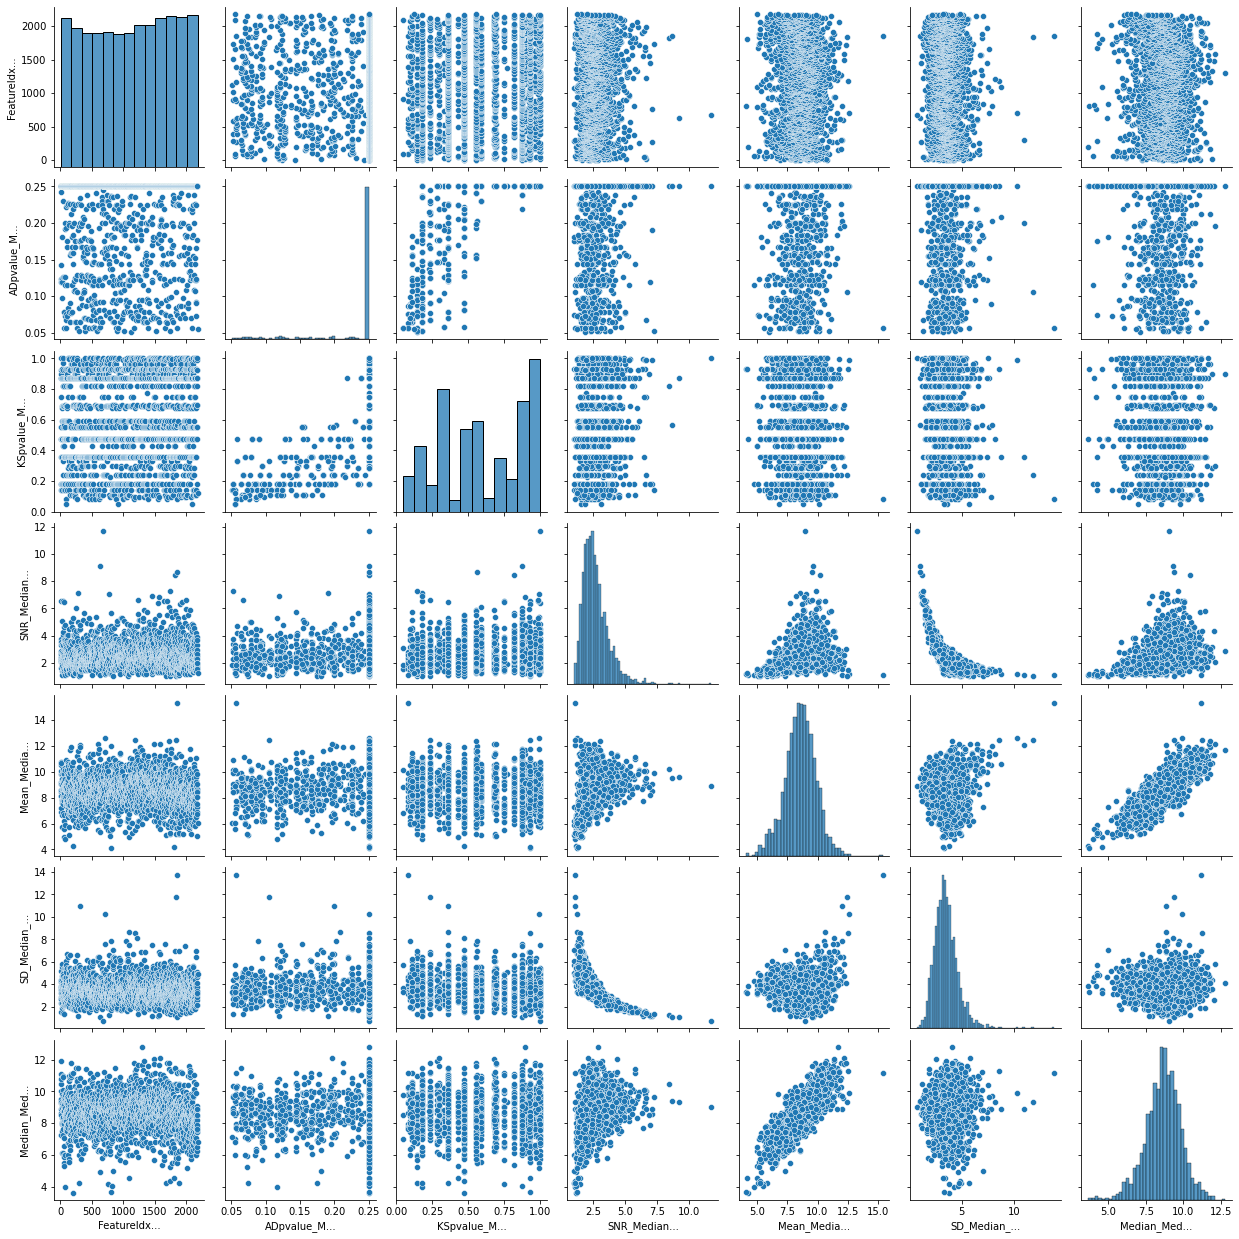

In [18]:
makePairPlot(surfacesRankPVF_SNR)

#### Step 4: Plot the ranking results

Step 4.1: Plot the rank versus the feature of interest (with the flat surface visualized by the large dot)

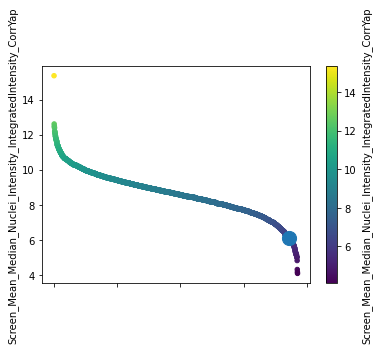

In [19]:
plotRank(rank=surfacesRankPVF_SNR, 
         featureOfInterest="Screen_Mean_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap")

Step 4.2: Plot boxplots of the top and botom scoring surfaces

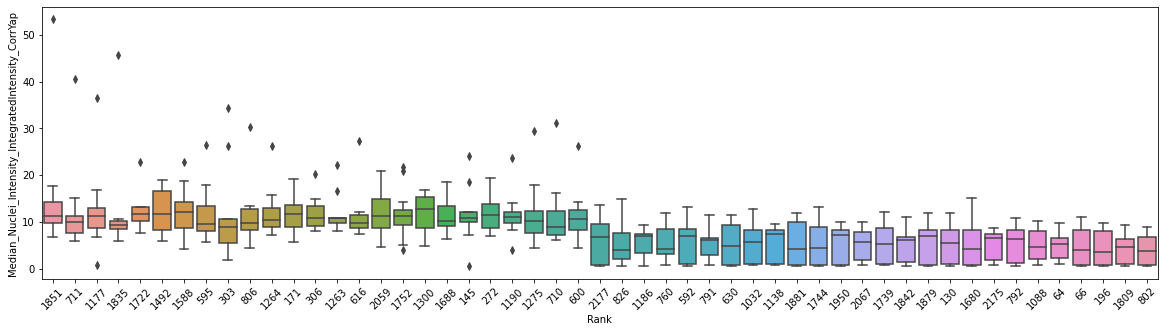

In [20]:
boxPlotTopAndBottom(screenData=imagedata,
                 rank=surfacesRankPVF_SNR,
                 featureOfInterest='Screen_Mean_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap',
                numberOfSurfaces=25)

In [ ]:
#showImagesFlat(ScreenData=rawImagedataFI_o2, 
#               featureOfInterest="Median_Nuclei_Intensity_IntegratedIntensity_CorrYap", 
#               stainingFile="FileName_actin", 
#               mode="raw" )

In [ ]:
#showImagesTopAndBottom(rank=surfacesRankPVF_SNR, 
#                       ScreenData=rawImagedataFI_o2, 
#                       featureOfInterest="Screen_Mean_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap",
#                       numberOfSurfaces=5, 
#                           stainingFile="FileName_Yap",
#                       mode="raw",
#                       surfPerRow=6)

#### Step 5: Perform a final ranking based on the feature of interest and save the data

In [21]:
FeatureOfInterestFinal="Screen_Mean_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap"

In [23]:
surfacesRankPVF_SNR_sorted=sortRanked(rank=surfacesRankPVF_SNR, 
         featureOfInterest=FeatureOfInterestFinal)

In [24]:
surfacesRankPVF_SNR_sorted.to_csv(os.getcwd()+"/DataAnalysis/Ranking.csv", index=False)